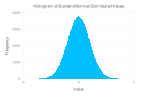

In [1]:
using Random
using Distributions
using Gadfly
Gadfly.push_theme(Theme(background_color="white"))
# Generate 10,000 standard normal distributed values

mean = 0
std_dev = 1

dist = Normal(mean, std_dev)

data = rand(dist, 1000000)

# Create a plot
plot(x=data, Geom.histogram(bincount=1000), Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title("Histogram of Standard Normal Distributed Values"))


In [67]:
function generate_n_bit_numbers(n)
    numbers = []
    for i in 0:(2^n - 1)
        binary_str = bitstring(i)[end-n+1:end]
        transformed = [c == '0' ? -1 : 1 for c in binary_str]
        push!(numbers, transformed)
    end
    return numbers
end

function generate_n_bit_numbers_alpha(n, a)
    numbers = []
    for i in 0:(2^n - 1)
        binary_str = bitstring(i)[end-n+1:end]
        transformed = [c == '0' ? a : 1 for c in binary_str]
        push!(numbers, transformed)
    end
    return numbers
end

n = 3  # Example for 3-bit numbers
weights = generate_n_bit_numbers(n)

8-element Vector{Any}:
 [-1, -1, -1]
 [-1, -1, 1]
 [-1, 1, -1]
 [-1, 1, 1]
 [1, -1, -1]
 [1, -1, 1]
 [1, 1, -1]
 [1, 1, 1]

In [25]:
# Generate Linear Combinations of the n chunks 

struct LinearCombination
    weights::Vector{Int}
    value::Float32
end 

struct LinearCombinationSet
    combination::Vector{LinearCombination}
end 

lincombs = collect(
    map(
        set -> begin
            LinearCombinationSet(
                collect(map(
                    weights -> begin
                        LinearCombination(weights, sum(weights .* set))
                    end,
                    weights
                ))
            )
        end, 
        Iterators.partition(data, n)
    )
)

333334-element Vector{LinearCombinationSet}:
 LinearCombinationSet(LinearCombination[LinearCombination([-1, -1, -1], -0.46155035f0), LinearCombination([-1, -1, 1], 1.7268894f0), LinearCombination([-1, 1, -1], 0.5308176f0), LinearCombination([-1, 1, 1], 2.7192574f0), LinearCombination([1, -1, -1], -2.7192574f0), LinearCombination([1, -1, 1], -0.5308176f0), LinearCombination([1, 1, -1], -1.7268894f0), LinearCombination([1, 1, 1], 0.46155035f0)])
 LinearCombinationSet(LinearCombination[LinearCombination([-1, -1, -1], 3.0396867f0), LinearCombination([-1, -1, 1], -0.847769f0), LinearCombination([-1, 1, -1], 1.8230432f0), LinearCombination([-1, 1, 1], -2.0644126f0), LinearCombination([1, -1, -1], 2.0644126f0), LinearCombination([1, -1, 1], -1.8230432f0), LinearCombination([1, 1, -1], 0.847769f0), LinearCombination([1, 1, 1], -3.0396867f0)])
 LinearCombinationSet(LinearCombination[LinearCombination([-1, -1, -1], -0.64566815f0), LinearCombination([-1, -1, 1], 0.26348335f0), LinearCombination([

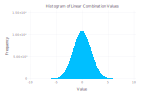

In [26]:
# plot all the values that fall out of this linear combination Vector

# Extract all the values to bastel them in there: 

lincomb_raw = reduce(vcat, map(set -> map(lc -> lc.value, set.combination), lincombs))

plot(x=lincomb_raw, Geom.histogram(bincount=1000), Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title("Histogram of Linear Combination Values"))

In [43]:
include("julia_code/bach.jl")

filtered = bach_enroll_first(lincombs)

333334-element Vector{LinearCombination}:
 LinearCombination([-1, 1, 1], 2.7192574f0)
 LinearCombination([-1, -1, -1], 3.0396867f0)
 LinearCombination([-1, 1, -1], -2.008254f0)
 LinearCombination([-1, 1, -1], -2.4076478f0)
 LinearCombination([-1, -1, -1], -3.3013134f0)
 LinearCombination([-1, -1, -1], -3.237814f0)
 LinearCombination([-1, -1, 1], 1.2490534f0)
 LinearCombination([-1, 1, -1], 2.4364948f0)
 LinearCombination([-1, -1, -1], 3.075283f0)
 LinearCombination([-1, 1, 1], 0.55019873f0)
 ⋮
 LinearCombination([-1, -1, 1], -0.8453437f0)
 LinearCombination([-1, 1, 1], 2.278465f0)
 LinearCombination([-1, 1, -1], -3.7038884f0)
 LinearCombination([-1, 1, 1], 5.123662f0)
 LinearCombination([-1, -1, -1], -2.9469655f0)
 LinearCombination([-1, 1, -1], -1.2610607f0)
 LinearCombination([-1, 1, 1], 3.6480913f0)
 LinearCombination([-1, 1, -1], -2.481137f0)
 LinearCombination([-1, -1, -1], -2.3837032f0)

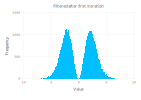

In [45]:
filtered_raw = collect(map(comb -> comb.value, filtered))

plot(x=filtered_raw, Geom.histogram(bincount=1000), Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title("Filtered after first iteration"))

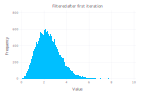

In [47]:
# Split the resulting values into two seperate sets for which we will do the things 

function plot_histogram(lincombs::Vector{LinearCombination})
    plot(x=collect(map(comb -> comb.value, lincombs)), Geom.histogram(bincount=1000), Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title("Filtered after first iteration"))
end

filtered_split = filter(x -> x.value > 0, filtered)

plot_histogram(filtered_split)

In [59]:
# Count all the elements in this half of the distribution and define the next bound based on the half of this distribution

index = floor(length(filtered_split) / 2)

# Sort the values to find the bound 

sorted_filtered_split = sort(filtered_split, by = x -> x.value)

bound = sorted_filtered_split[convert(Int, index)].value

# Generate 0.5 weight vector multiplication 



2.2927194f0